In [3]:
#initialization
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# importing Qiskit
from qiskit import IBMQ, BasicAer, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute

# import basic plot tools
from qiskit.tools.visualization import plot_histogram

In [5]:
provider = IBMQ.load_account()

Credentials are already in use. The existing account in the session will be replaced.


In [6]:
q = QuantumRegister(9)
c = ClassicalRegister(5)
qc = QuantumCircuit(q, c)

In [7]:
qc.x(q[5])
qc.h(q[0:6])
qc.barrier(q)

In [8]:
qc.barrier(q)

# build oracle. ex: to find 10101 state
qc.x(q[1])
qc.x(q[3])
qc.barrier(q)
qc.mct([q[0], q[1], q[2], q[3], q[4]], q[5], q[6:9])    # control qubits, target qubit, ancilla qubits = number of control qubits - 2
qc.barrier(q)
qc.x(q[1])
qc.x(q[3])

qc.barrier(q)

In [9]:
qc.barrier(q)
qc.h(q[0:5])
qc.barrier(q)
qc.x(q[0:5])
qc.barrier(q)
qc.h(q[4])
qc.barrier(q)
qc.mct([q[0], q[1], q[2], q[3], q[4]], q[5], q[6:9])
qc.barrier(q)
qc.h(q[4])
qc.barrier(q)
qc.x(q[0:5])
qc.barrier(q)
qc.h(q[0:5])
qc.barrier(q)

In [10]:
qc.measure(q[0:5], c[0:5])

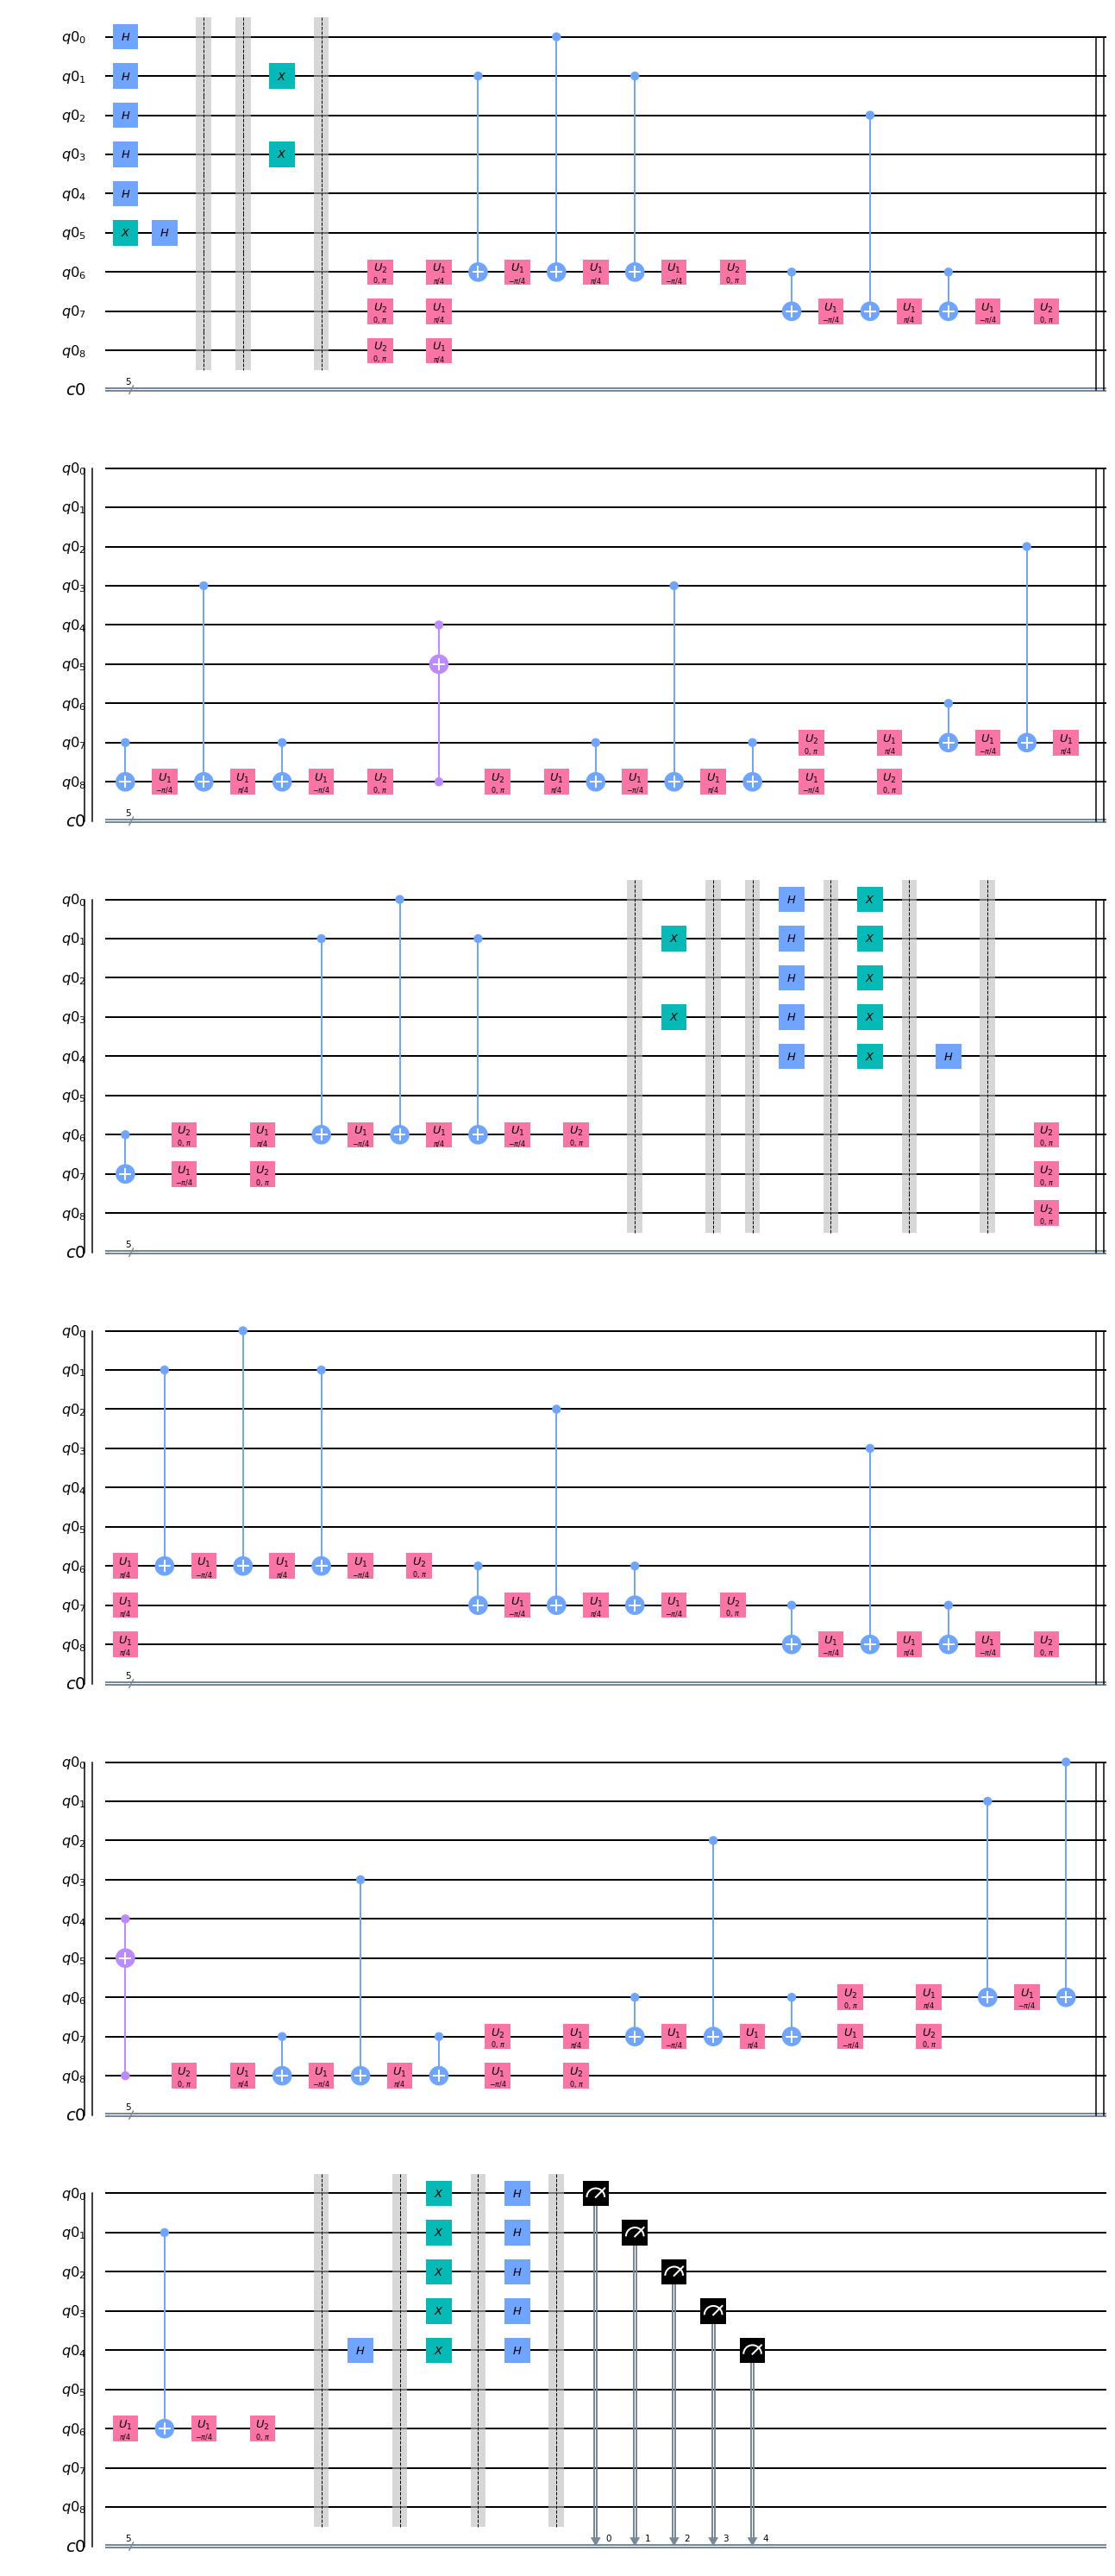

In [11]:
qc.draw(output='mpl')

In [12]:
# running and getting results 

backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=1000)
# backend = provider.get_backend('ibmq_qasm_simulator')
# job = execute(qc, backend=backend, shots=8000, seed_simulator=12345, backend_options={"fusion_enable":True})
result = job.result()
count = result.get_counts()
print(count)

{'10100': 15, '00000': 25, '10101': 234, '11101': 19, '10010': 18, '11010': 11, '11000': 17, '00011': 36, '10111': 17, '00100': 42, '01100': 35, '01000': 29, '00010': 37, '01010': 25, '11100': 18, '00110': 37, '01110': 35, '10011': 18, '01001': 31, '11001': 15, '00001': 30, '01011': 29, '00101': 34, '10001': 21, '11011': 22, '11111': 14, '10110': 17, '01111': 27, '00111': 32, '10000': 19, '01101': 24, '11110': 17}


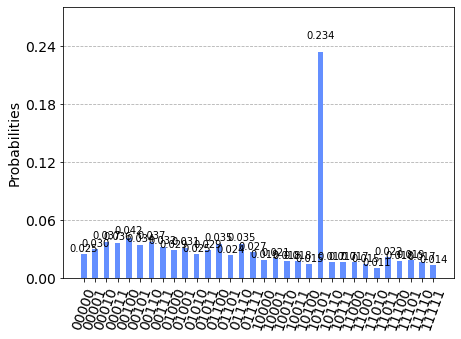

In [13]:
plot_histogram(count)